# Valores críticos em uma distribuição $\chi^2$

**(a)** Encontre o valor crítico $\chi^2_0$ para um teste unilateral à direita com $\alpha = 0,10$ e $n = 26$.

**(b)** Encontre o valor crítico $t_0$ para um teste unilateral à esquerda com
$\alpha = 0,01$ e $n = 11$.

**(c)** Encontre os valores críticos $\chi^2_L$ e $\chi^2_R$ para um teste bilateral com $\alpha = 0,05$ e $n = 9$.

In [6]:
import scipy.stats as st
# Item (a)
alpha, n = 0.10, 26
dist_chi2 = st.chi2(df=n-1)
X20 = dist_chi2.ppf(1-alpha)
print(f'Teste unilateral à direita com alpha = {alpha*100}% - Valor crítico = {X20:.5f}')
# Item (b)
alpha, n = 0.01, 11
dist_chi2 = st.chi2(df=n-1)
X20 = dist_chi2.ppf(alpha)
print(f'Teste unilateral à esquerda com alpha = {alpha*100}% - Valor crítico = {X20:.5f}')
# Item (c)
alpha, n = 0.05, 9
dist_chi2 = st.chi2(df=n-1)
X2L = dist_chi2.ppf(alpha/2)
X2R = dist_chi2.ppf(1-alpha/2)
print(f'Teste bilateral com alpha = {alpha*100}% - Valores críticos = {X2L:.5f} e {X2R:.5f}')

Teste unilateral à direita com alpha = 10.0% - Valor crítico = 34.38159
Teste unilateral à esquerda com alpha = 1.0% - Valor crítico = 2.55821
Teste bilateral com alpha = 5.0% - Valores críticos = 2.17973 e 17.53455


# Função *teste_chi2* para o teste de hipótese da variância e desvio padrão

A função *teste_chi2* decide sobre a validade da hipótese nula ao verificar se o(s) valor(es) crítico(s) qui-quadrado pertencem à região de rejeição.

In [17]:
def teste_chi2(est_amostral=None, pop=None, n_amostras=None, alpha=0.05,
               teste='esq', parametro='sig'):
  '''Função para teste de hipótese da variância (parametro='sig') ou do desvio
     padrão (parametro='pad') populacional (pop), com nível de significância alpha.
     A estatística amostral (est_amostral) é obtida a partir de uma amostra com
     n_amostras elementos. Forneça o tipo de teste: unilateral à esquerda
     ('esq'), unilateral à direita ('dir') ou bilateral ('bilateral').'''
  # Criação da distribuição chi-quadrado
  dist_chi2 = st.chi2(df=n_amostras-1)
  # Cálculo da estatística de teste padronizada
  if parametro == 'sig':
    chi2 = (n_amostras-1)*est_amostral/pop
    param = 'variância'
  elif parametro == 'pad':
    chi2 = (n_amostras-1)*est_amostral**2/pop**2
    param = 'desvio padrão'
  # Hipótese nula inicialmente validade
  rejeicao = False
  # Cálculo do z crítico, de acordo com o tipo de teste
  if teste == 'esq':
    X20 = dist_chi2.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de z à região de rejeição
    if chi2 <= X20:
      rejeicao = True
  elif teste == 'dir':
    X20 = dist_chi2.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de z à região de rejeição
    if chi2 >= X20:
      rejeicao = True
  elif teste == 'bilateral':
    X2L = dist_chi2.ppf(alpha/2)
    X2R = dist_chi2.ppf(1-alpha/2)
    tipo = 'bilateral'
    X20 = (X2L, X2R)
    # Decisão sobre pertinência de z à região de rejeição
    if (chi2 <= X2L) or (chi2 >= X2R):
      rejeicao = True
  # Saída - Conclusão do teste
  print(f'*** Teste de hipótese para {param} ***')
  print(f'Teste {tipo} com:')
  print(f'Estatística de teste padronizada = {chi2:.4f}')
  if isinstance(X20, tuple):
    print(f'Valores chi-quadrado críticos = {X20[0]:.4f} e {X20[1]:.4f}')
  else:
    print(f'Valor chi-quadrado crítico = {X20:.4f}')
  if rejeicao:
    print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
  else:
    print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return chi2, X20

# Exercício 01

Uma empresa de processamento de laticínios afirma que a variância da quantidade de gordura no leite integral processado por ela é não mais que 0,25. Você suspeita que essa afirmação esteja errada e descobre que uma amostra aleatória de 41 recipientes de leite tem uma
variância de 0,27.

Para um nível de significância $\alpha = 0,05$, há evidência suficiente para rejeitar a afirmação da empresa? Suponha que a população é normalmente distribuída.

In [12]:
# H0: sigma2 <= 0.25 (afirmação)
# Ha: sigma2 > 0.25
est_teste, X2critico = teste_chi2(est_amostral=0.27, pop=0.25, n_amostras=41,
                                  alpha=0.05, teste='dir', parametro='sig')

*** Teste de hipótese para variância ***
Teste unilateral à direita com:
Estatística de teste padronizada = 43.2000
Valor(es) chi-quadrado crítico(s) = 55.7585
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 02

Uma empresa afirma que o desvio padrão do tempo de duração de uma ligação recebida para ser transferida para a área correta é menor que 1,4 minuto. Uma amostra aleatória de 25 ligações recebidas tem um desvio padrão de 1,1 minuto.

Para o nível de significância $\alpha = 0,10$,
há evidência suficiente para concordar com a afirmação da empresa? Suponha que a população é normalmente distribuída.

In [19]:
# H0: sigma >= 1.4 min
# Ha: sigma < 1.4 min (afirmação)
est_teste, X2critico = teste_chi2(est_amostral=1.1, pop=1.4, n_amostras=25,
                                  alpha=0.1, teste='esq', parametro='pad')

*** Teste de hipótese para desvio padrão ***
Teste unilateral à esquerda com:
Estatística de teste padronizada = 14.8163
Valor chi-quadrado crítico = 15.6587
Hipótese nula rejeitada ao nível de significância 10.0%


# Exercício 03

Um fabricante de artigos esportivos afirma que a variância da força de uma certa linha de pesca é de 15,9. Uma amostra aleatória de 15 rolos de linha tem uma variância de 21,8.

Para o nível de significância $\alpha = 0,05$, há evidência suficiente para rejeitar a afirmação do fabricante? Suponha que a população é normalmente distribuída.

In [18]:
# H0: sigma2 = 15.9 (afirmação)
# Ha: sigma2 != 15.9
est_teste, X2critico = teste_chi2(est_amostral=21.8, pop=15.9, n_amostras=15,
                                  alpha=0.05, teste='bilateral', parametro='sig')

*** Teste de hipótese para variância ***
Teste bilateral com:
Estatística de teste padronizada = 19.1950
Valores chi-quadrado críticos = 5.6287 e 26.1189
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 04

Um chefe de polícia afirma que o desvio padrão dos tempos de resposta é menor que 3,7 minutos. Uma amostra aleatória de 9 tempos de resposta tem um desvio padrão de 3,0 minutos.

Para o nível de significância $\alpha = 0,05$, há evidência suficiente para concordar com a afirmação do chefe de polícia? Suponha que a população é normalmente
distribuída.

In [20]:
# H0: sigma >= 3.7 min
# Ha: sigma < 3.7 min (afirmação)
est_teste, X2critico = teste_chi2(est_amostral=3.0, pop=3.7, n_amostras=9,
                                  alpha=0.05, teste='esq', parametro='pad')

*** Teste de hipótese para desvio padrão ***
Teste unilateral à esquerda com:
Estatística de teste padronizada = 5.2593
Valor chi-quadrado crítico = 2.7326
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 05

Uma empresa que oferece produtos dietéticos e serviços de perda de peso afirma que a variância das perdas de peso de seus usuários é de 25,5. Uma amostra aleatória de 13 usuários tem uma variância de 10,8.

Para o nível de significância a = 0,10, há evidência suficiente para rejeitar a afirmação da empresa? Suponha que a população é normalmente distribuída.

In [21]:
# H0: sigma2 = 25.5 (afirmação)
# Ha: sigma2 != 25.5
est_teste, X2critico = teste_chi2(est_amostral=10.8, pop=25.5, n_amostras=13,
                                  alpha=0.10, teste='bilateral', parametro='sig')

*** Teste de hipótese para variância ***
Teste bilateral com:
Estatística de teste padronizada = 5.0824
Valores chi-quadrado críticos = 5.2260 e 21.0261
Hipótese nula rejeitada ao nível de significância 10.0%


# Exercício 06

O salário anual (em dólares) de 14 bombeiros escolhidos aleatoriamente está listado a seguir.

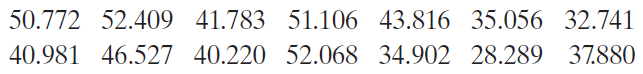

Para o nível de significância $\alpha = 0,05$, há evidência suficiente para concordar com a afirmação de que o desvio padrão dos salários anuais é diferente de US$ 5.500? (Adaptado de: *Salary.com*)

In [24]:
import pandas as pd
# Conjunto de dados
salarios = pd.Series([50772, 52409, 41783, 51106, 43816, 35056, 32741,
                      40981, 46527, 40220, 52068, 34902, 28289, 37880])
# H0: sigma = 5500 dólares
# Ha: sigma != 5500 dólares (afirmação)
est_teste, X2critico = teste_chi2(est_amostral=salarios.std(), pop=5500,
                                  n_amostras=len(salarios), alpha=0.05,
                                  teste='bilateral', parametro='sig')

*** Teste de hipótese para variância ***
Teste bilateral com:
Estatística de teste padronizada = 18.3894
Valores chi-quadrado críticos = 5.0088 e 24.7356
Hipótese nula NÃO rejeitada ao nível de significância 5.0%
